# UC: sistema dinámico

Tomo el modelo de Zhao de "Upcoversion luminiscence with tunable lifetime in NaYF4". Considera un estado excitado para el Yb (Yb, 2) y cuatro estados excitados diferenciables para el Er (Er, 1), (Er, 2), (Er, 3), (Er, 5) y (Er, 6). Simbolizo con S al número de estados excitado del Yb y A, B, C, D y E a los correspondientes números de estados excitados relevantes del Er. La población del estado 4 se considera desierta (ver diagrama de bandas). De esta manera el sistema de ecuaciones que gobierna el sistema es
$$
\begin{align}
\dot{S} &= \rho \sigma_S R - k_{FT} AS - k_{B}BS-k_{C}CS\\
\dot{B} &= -\rho \sigma_B B - k_{B} BS - W_B B + W_{CB}C+W_{DB}D+W_{EB}E\\
\dot{C} &= k_{FT} AS - \rho \sigma_C C - k_{C}CS - W_C C + W_{DC}D+W_{EC}E\\
\dot{D} &= \rho \sigma_B B + k_{B} BS - W_D D + W_{ED} E\\
\dot{E} &= \rho \sigma_C C + k_{C} CS - W_E E\\
\end{align}
$$
$R$ es la cantidad inicial de iones de Yb no excitado, puede ponerse como constante. $\rho$ es la potencia del laser incidente sobre la muestra, $\sigma_S$ es la sección eficaz del Yb y tambien se consideran procesos a un ion para el Er a modo de GSA/ESA cuantificados por las secciones eficaces $\sigma_B$ y $\sigma_C$, pues estos niveles de bajas energías podrían ser excitados a 980 nm. Por otra parte $k_{FT}$ es el coeficiente de transferencia de Yb a Er (la fuente de bombeo más importante para el Er), cada uno de los coeficientes $k_B, K_C$ son los de sensibilización cooperativa:
$k_B$: (Yb, 2) + (Er, 2) -> (Er, 5)
$k_C$: (Yb, 2) + (Er, 3) -> (Er, 6)
Por último, los coeficientes $W_B$, $W_C$, $W_D$ y $W_E$ son las sumas de las tasas radiativas y no radiativas mientras que las $W_{ij}$ corresponden a las tasas de decaimiento del estado $i$ al $j$. De esta manera $W{i} = \sum_{j<i}{W_{ij}}$ (el símbolo $<$ es para comparar la energía de los estados).
OBS: en general no se cumple, por ejemplo, que $\tau_B = \frac{1}{W_B}$ como en casos de un único estado excitado dado que a las tasas propias de cada uno de ellos deben sumarse los efectos de la dinamica de los niveles superiores que decaen al estado considerado. Por esta razón los coeficientes $W$ no se pueden obtener directamente de medir los tiempos de vida auque en el artículo de Zhao los obtienen analizando las soluciones del estacionario.

## Obtención de los coeficientes y análisis de las soluciones

Las componentes no lineales se vuelven despreciables y el comportamiento dominante es el exponencial.
Reescribo las ecuaciones usando variables de estado.


In [1]:
def ucsystem(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [A, B, C, D, E, R, S]
        t :  time
        p :  vector of the parameters:
                  p = [S0, r, kFT, kB, kC, sS, sB, sC, WA, WB, WC, WD, WE, WCB, WDB, WEB, WEC, WED]
    """
    A, B, C, D, E, R, S = w
    r, kFT, kB, kC, sS, sB, sC, WA, WB, WC, WD, WE, WCB, WDB, WDC, WEB, WEC, WED = p

    # Create f = (A', B', C', D', E', R', S'):
    f = [0,
         -r*sB*B - kB*B*S - WB*B + WCB*C + WDB*D + WEB*E,
         kFT*A*S - r*sC*C - kC*C*S - WC*C + WDC*D + WEC*E,
         r*sB*B + kB*B*S - WD*D + WED*E,
         r*sC*C + kC*C*S - WE*E,
         0,
         r*sS*R - kFT*A*S - kB*B*S - kC*C*S]
    return f

[10, 0, 0, 0, 0, 2, 0]


Text(0, 0.5, 'Amplitud')

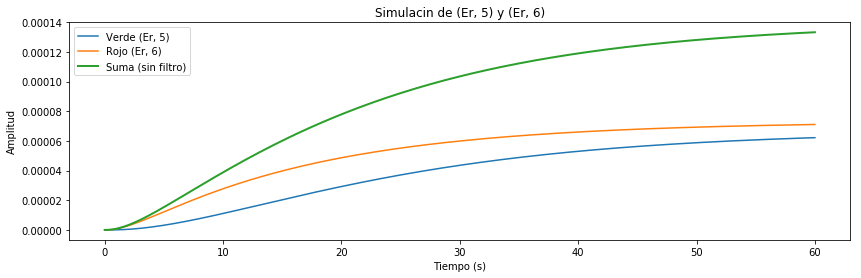

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
%matplotlib inline
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
# Parameter values
# Laser power
r = .001
# k coeffs:
kFT , kB, kC = 1, 2, 5
# Cross sections
sS, sB, sC = 1, .005, .1
# Decay rates
WA, WB, WC, WD, WE = .01, .1, 0.05, 2, .5
WCB, WDB, WDC, WEB, WEC, WED = 1, 0, 0, 0, 0, 0
# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
A0, B0, C0, D0, E0, R0, S0 = 10, 0, 0, 0, 0, 2, 0
# ODE solver parameters
abserr, relerr, stoptime, numpoints = 1.0e-8, 1.0e-6, 60.0, 250
# Create the time samples for the output of the import sympy as sp
t = [stoptime*float(i)/(numpoints - 1) for i in range(numpoints)]
# Pack up the parameters and initial con + WDC*D + WEC*E
p = [r, kFT, kB, kC, sS, sB, sC, WA, WB, WC, WD, WE, WCB, WDB, WDC, WEB, WEC, WED]
w0 = [A0, B0, C0, D0, E0, R0, S0]
# Call the ODE solver.
print(w0)
wsol = odeint(ucsystem, w0, t, args=(p,), atol=abserr, rtol=relerr)
#with open('ucsystem.dat', 'w') as f:
    # Print & save the solution.
w1 = zip(t, wsol)
#    w1[0], w1[1], w1[2], w1[3], w1[4])
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=[14, 4])
l_names = ['A', 'B', 'C', 'D', 'E', 'R', 'S']
names = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'R', 6:'S'}
signals = dict()
i = 0
for l in l_names:
    signals[l] = np.asarray([s[i] for s in wsol])
    i += 1
ax.plot(t, signals['D'], label = 'Verde (Er, 5)')
ax.plot(t, signals['E'], label = 'Rojo (Er, 6)')
ax.plot(t, signals['D']+signals['E'], label = 'Suma (sin filtro)', lw = 2)
#ax.set_ylim([0, 1]);
ax.legend();
ax.set_title('Simulacin de (Er, 5) y (Er, 6)');
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud')

# print(ucsystem())

In [ ]:
import sympy as sp
from sympy import symbols, cos, sin

r, A0, R0, kFT, kB, kC, sB, sC, WB, WC, WD, WE, WCB, WDB, WDC, WEB, WEC, WED = \
symbols('r, A0, R0, kFT, kB, kC, sB, sC, WB, WC, WD, WE, WCB, WDB, WDC, WEB, WEC, WED')
B, C, D, E, S  = symbols('B, C, D, E, S')

g1 = -r*sB*B - kB*B*S - WB*B + WCB*C + WDB*D + WEB*E
g2 = kFT*A0*S - r*sC*C - kC*C*S - WC*C + WDC*D + WEC*E
g3 = r*sB*B + kB*B*S - WD*D + WED*E
g4 = r*sC*C + kC*C*S - WE*E
g5 = r*R0 - kFT*A0*S - kB*B*S - kC*C*S
print('r')

sp.solvers.solve((g1, g2, g3, g4, g5), (B, C, D, E, S))

## Sistema simplificado

Sea un sistema simple compuesto por un ion que actúe como sensibilizador (S) y un receptor (R). Del sensibilizador, importan dos estados en la ecuación dinámica: el fundamental y el primer estado excitado. En una primera aproximación, debe cumplirse que
$$
-\frac{dS_0}{dt} = \frac{dS_1}{dt} = \rho S_0
$$
siendo $\rho$ la potencia incidente del laser multiplicado por el coeficiente de absorción de esa banda del Yb. El estado $S_1$ tiene en principio dos vías de decaimiento, una es de nuevo hacia el estado fundamental $S_0$ y la otra es hacia algún estado excitado de R. De esta manera hay dos coeficientes de decaimiento $k_S$ y $k_{FT}$ que se habrían de añadir a la dinámica de $S_1$. La transmisión de $S_1$ (Forward Transmission) hacia R_1 depende tanto de la cantidad de receptores en su estado fundamental $R_0$ como de la cantidad de estados excitados $S_1$
$$
\frac{dS_1}{dt} =  \rho S_0 - k_{FT} S_1 R_0
$$

In [2]:
import sympy as sp

r, S0, A0, kFT, kC, sS, sB, sC,  WC, WE = \
sp.symbols('r, S0, A0, kFT, kC, sS, sB, sC,  WC, WE')
C, E, S  = symbols('C, E, S')

g1 = r*sS*S0 - kFT*A0*S
g2 = kFT*A0*S - r*sC*C - kC*C*S - WC*C
g3 = r*sC*C + kC*C*S - WE*E


sp.solvers.solve((g1, g2, g3), (C, E, S))

[(A0*S0*kFT*r*sS/(A0*WC*kFT + A0*kFT*r*sC + S0*kC*r*sS),
  S0*r**2*sS*(A0*kFT*sC + S0*kC*sS)/(WE*(A0*WC*kFT + A0*kFT*r*sC + S0*kC*r*sS)),
  S0*r*sS/(A0*kFT))]